In [1]:
#importing the required librarties and warnign packages 
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

In [2]:
#Reading the data file
hs = pd.read_csv("train.csv")
hs.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
hs.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
NA_col = hs.isnull().sum()
NA_col = NA_col[NA_col > 0]

In [6]:
print((round(100*NA_col[NA_col > 0]/len(hs),2)).sort_values(ascending = False))

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64


In [7]:
# Dropping Columns with high missing values ,above 80%
hs.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

In [8]:
#defining the funstion to handle missing values with mode for categorical values and median for int and float

def missing_Values_Treating(df):

    NA_col = df.isnull().sum()
    NA_col = NA_col[NA_col > 0]
    for col in NA_col.index:
        if df[col].dtype.name == 'object':
            # impute mode
            df[col].fillna(df[col].mode()[0], inplace=True)
            
        elif df[col].dtype.name == 'float64' or df[col].dtype.name == 'int64' or df[col].dtype.name == 'int32':
            # impute median
            df[col] = df[col].fillna((df[col].median()))
            
        else:
            print('datatype not identified for col - ', col)
            
    return df

In [9]:
#calling the function to adjust missing values
hs = missing_Values_Treating(hs)

In [10]:
#Checking the null values after adjusting missing values with mode and median
NA_col = hs.isnull().sum()
NA_col = NA_col[NA_col > 0]
print((round(100*NA_col[NA_col > 0]/len(hs),2)).sort_values(ascending = False))

Series([], dtype: float64)


In [11]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

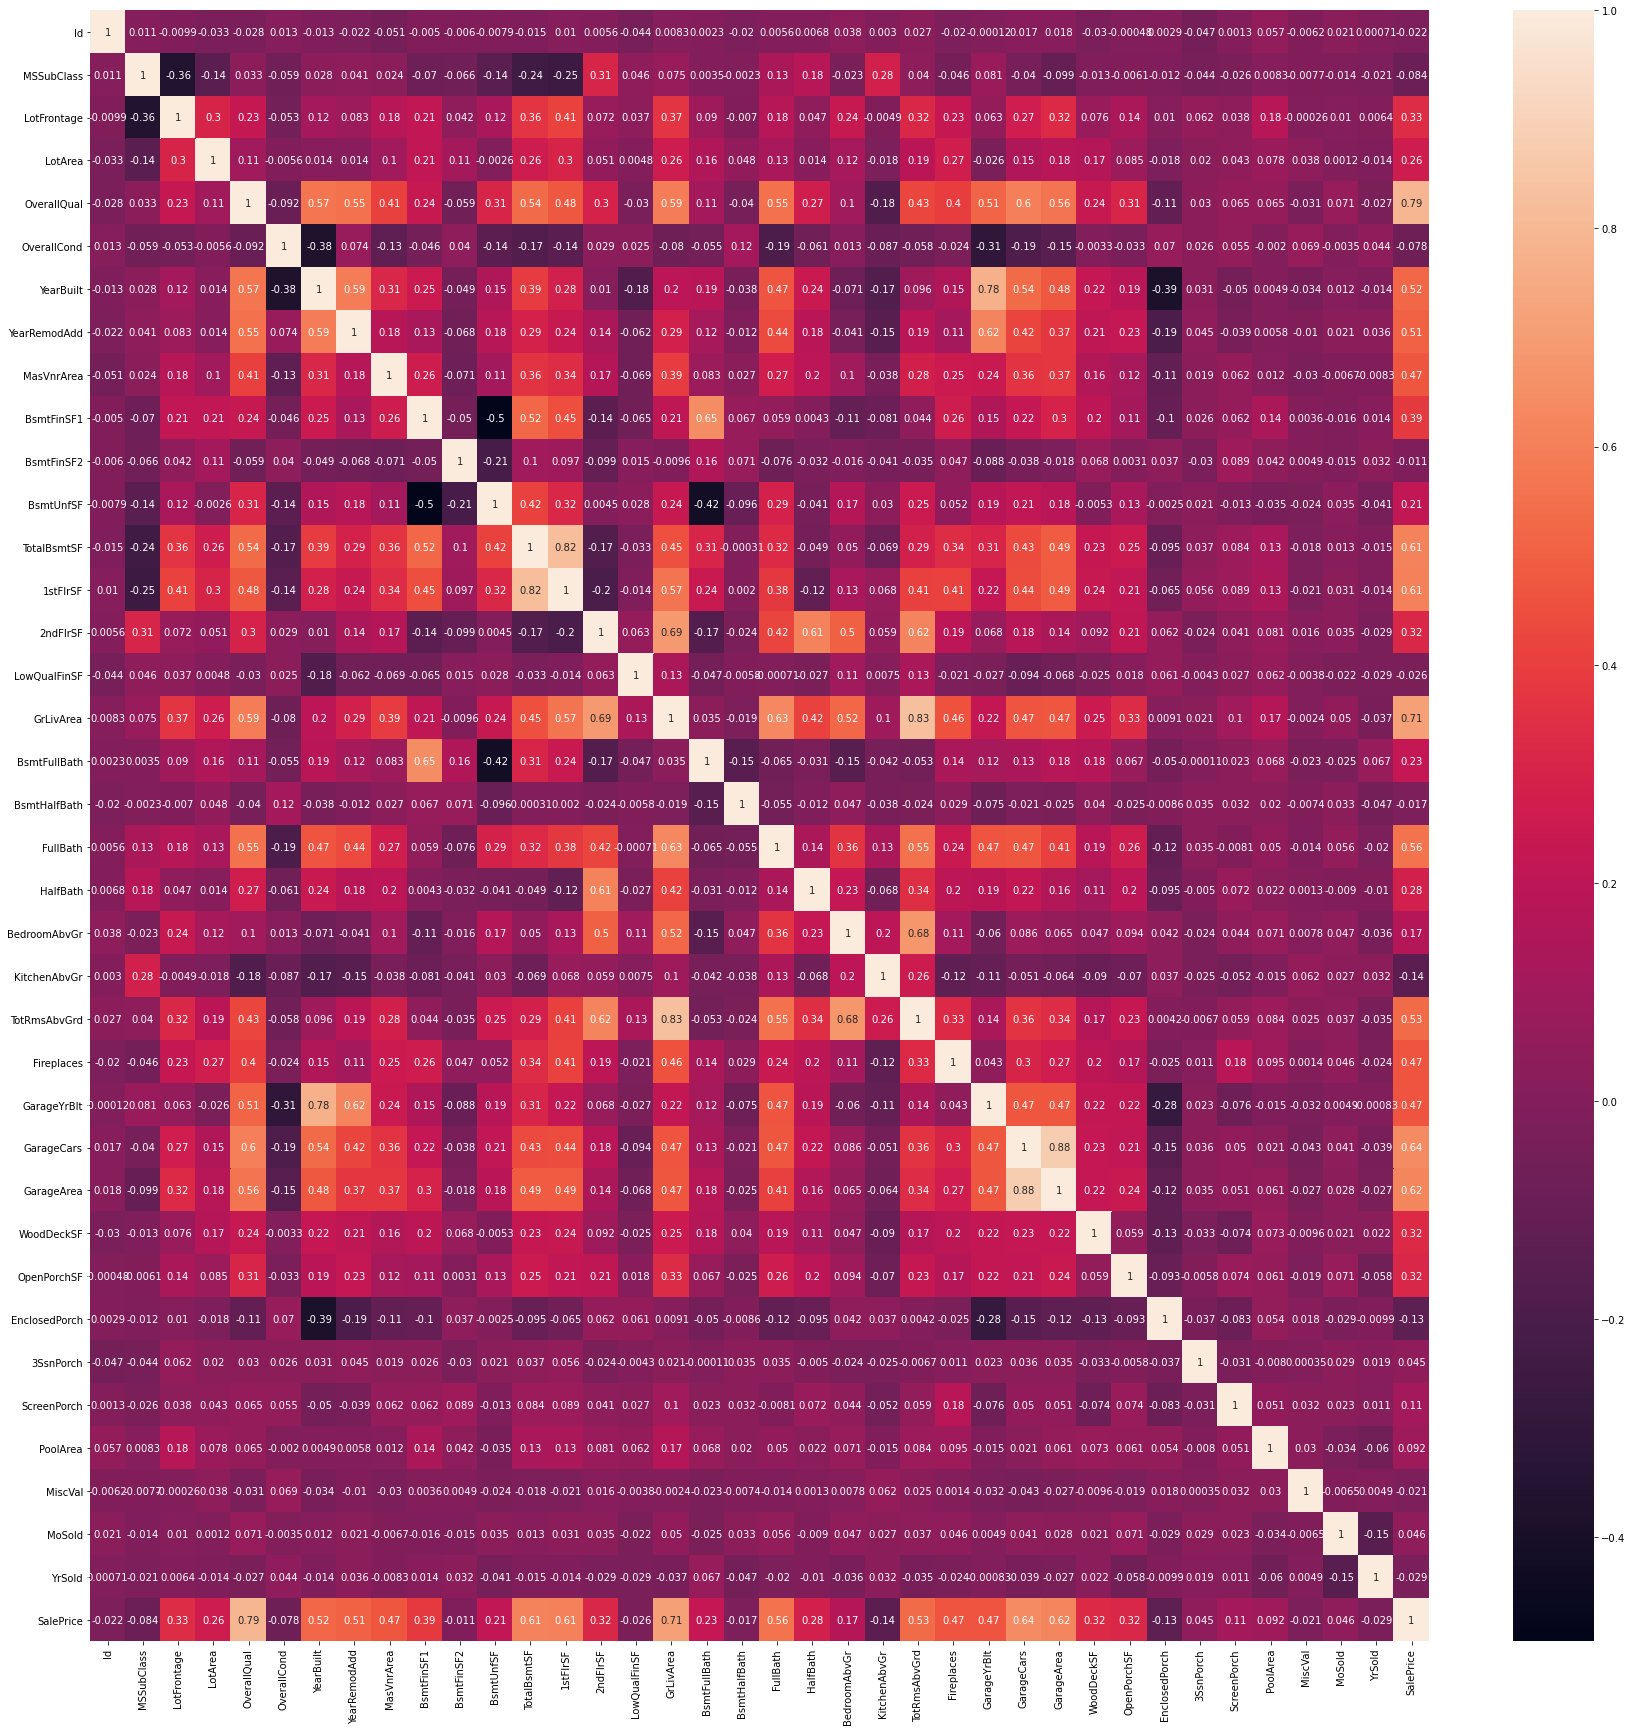

In [12]:
#checking the correlation between the variables
plt.figure(figsize=(30,30))
sns.heatmap(hs.corr(),annot=True)
plt.show()

**From the abobe heatmap we can observe that some the numerical features are highly related with sales price**

* OverallQual
* YearBuilt
* YearRemodAdd
* MasVrnArea
* TotalBsmtSF
* 1stFlrSF
* GrLivArea
* FullBath
* TotRmsAbvGrd
* FirePlaces
* GarageBlt
* GarageCars
* GarageArea

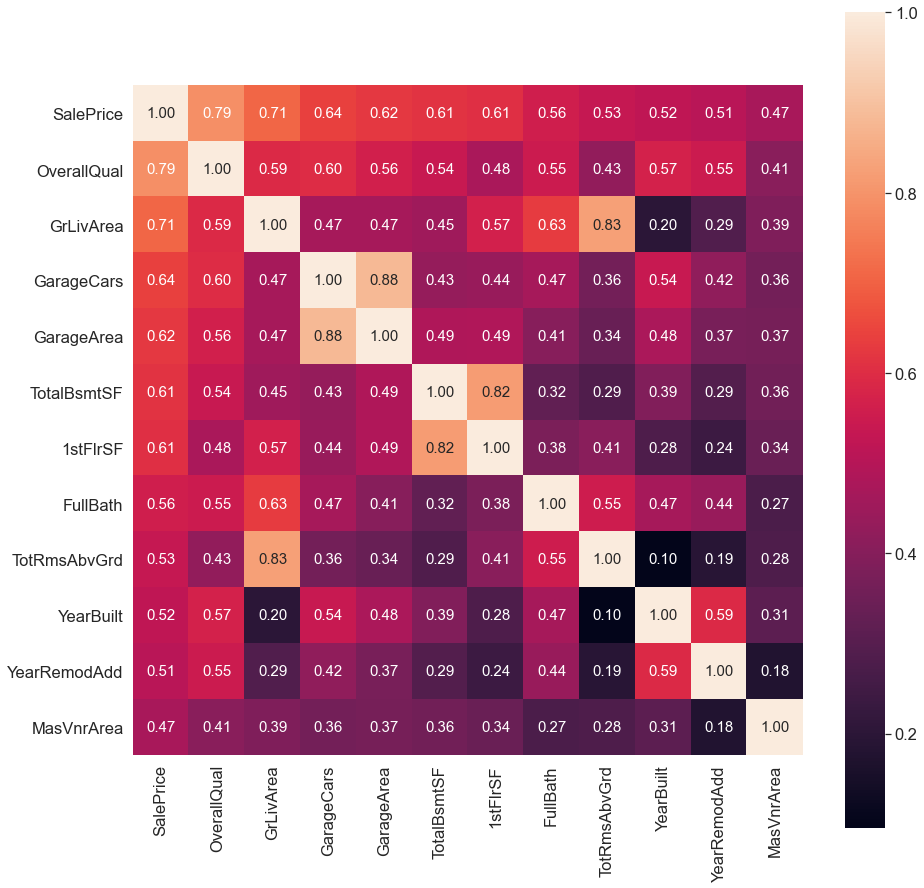

In [13]:
# Top 12 features corrleated with Sale Price
k = 12
cols = hs.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(hs[cols].values.T)
plt.figure(figsize=(15,15))
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Observations**
- OverallQual - Higher the Overall quality of the house, higher the price of the house.
- Grlivarea - Price increase with increase in the floor above the ground floor
- Garage cars, garage area, total basement SF, 1st floor SF also play a role for the price. 

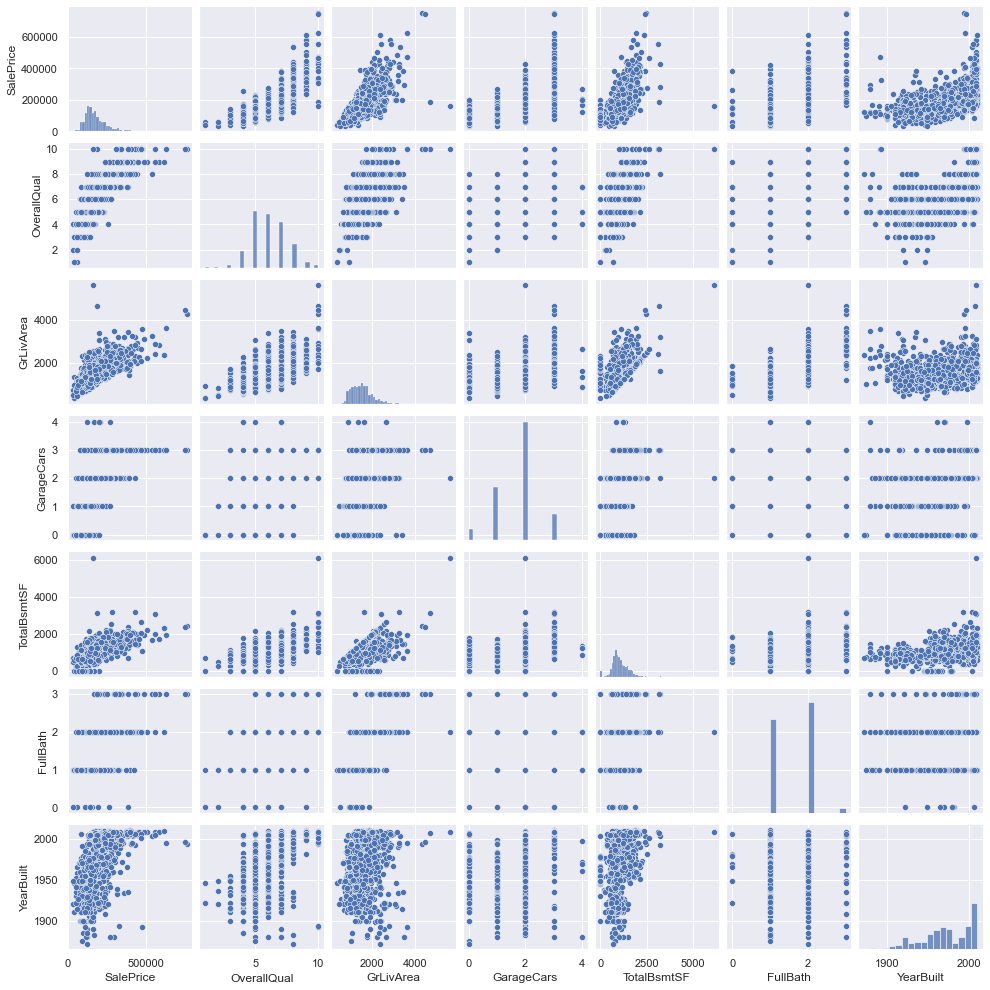

In [14]:
#pairplot for few top features we found from correlation matrix
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(hs[cols],height = 2)
plt.show()

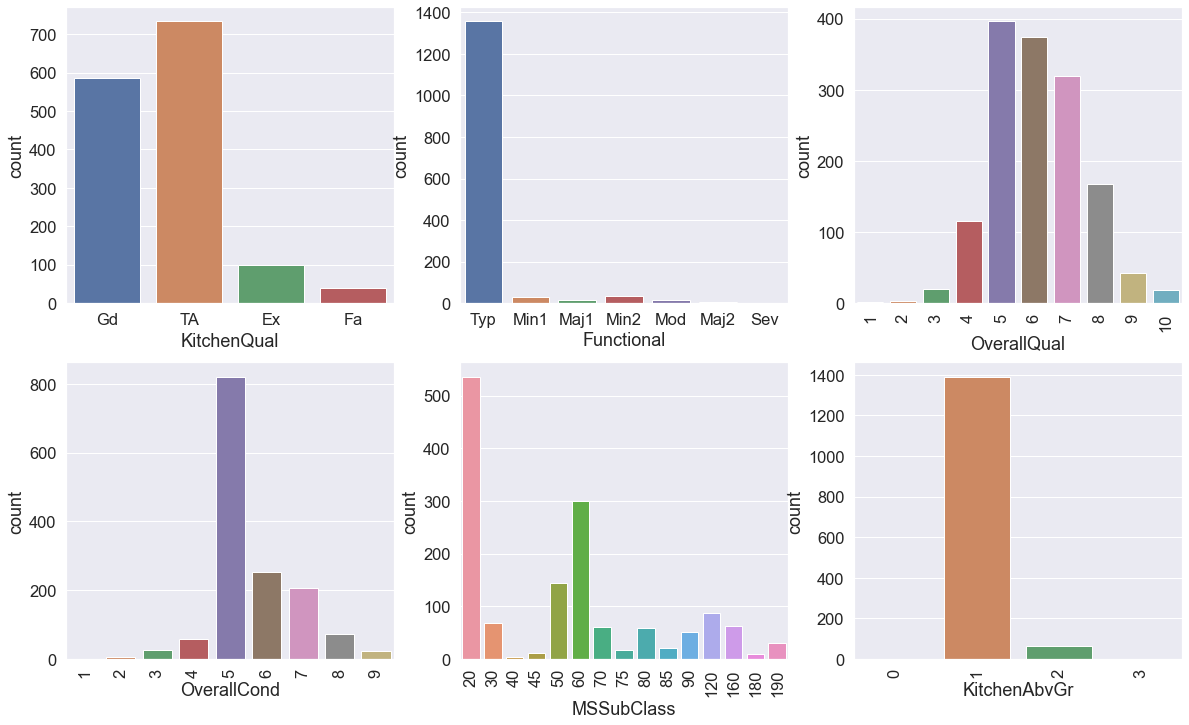

In [102]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'KitchenQual',  data = hs)
plt.subplot(2,3,2)
sns.countplot(x = 'Functional', data = hs)
plt.subplot(2,3,3)
sns.countplot(x = 'OverallQual', data = hs)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'OverallCond', data = hs)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.countplot(x = 'MSSubClass',  data = hs)
plt.xticks(rotation=90)
plt.subplot(2,3,6)
sns.countplot(x = 'KitchenAbvGr',  data = hs)
plt.xticks(rotation=90)
plt.show()

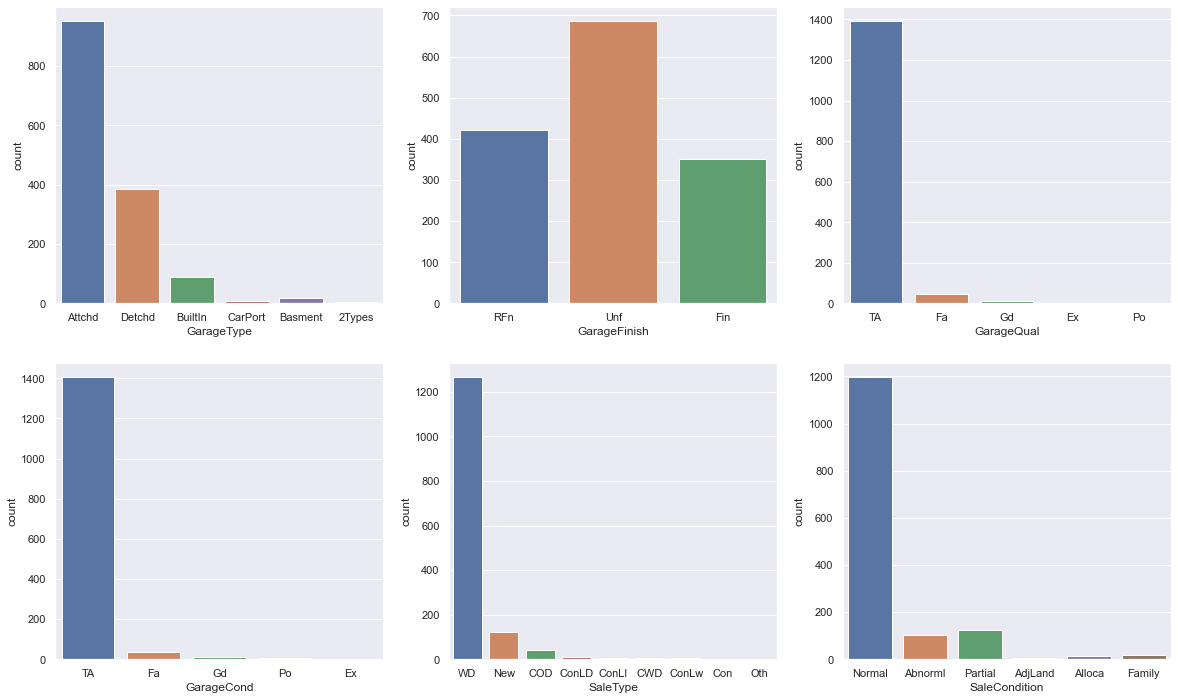

In [16]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageType',  data = hs)
plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish', data = hs)
plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = hs)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageCond', data = hs)
plt.subplot(2,3,5)
sns.countplot(x = 'SaleType',  data = hs)
plt.subplot(2,3,6)
sns.countplot(x = 'SaleCondition', data = hs)
plt.show()

In [17]:
#Labelling the low values as others to make the analysis easy.
hs['GarageType'] = hs['GarageType'].replace(['Basment','CarPort','2Types'],'Others')
hs['SaleCondition'] = hs['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')

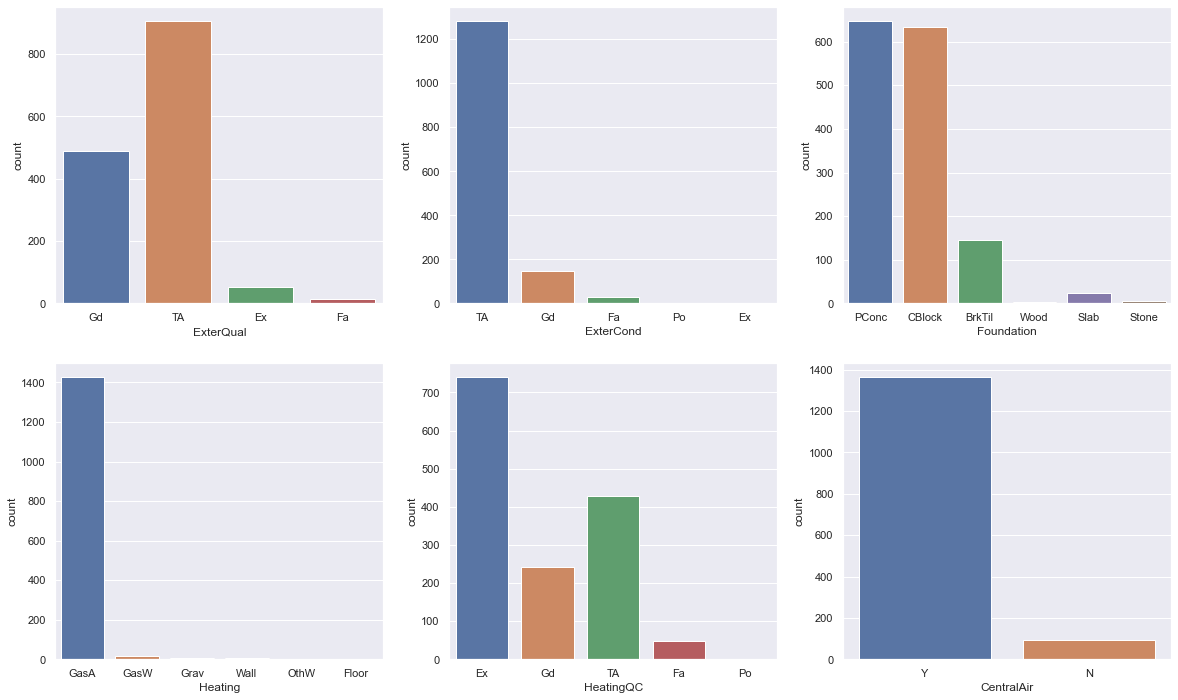

In [18]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'ExterQual',  data = hs)
plt.subplot(2,3,2)
sns.countplot(x = 'ExterCond', data = hs)
plt.subplot(2,3,3)
sns.countplot(x = 'Foundation', data = hs)
plt.subplot(2,3,4)
sns.countplot(x = 'Heating', data = hs)
plt.subplot(2,3,5)
sns.countplot(x = 'HeatingQC',  data = hs)
plt.subplot(2,3,6)
sns.countplot(x = 'CentralAir', data = hs)
plt.show()

In [19]:
#Labelling the low values as others to make the analysis easy.
hs['Foundation'] = hs['Foundation'].replace(['Slab','Stone','Wood'],'Others')

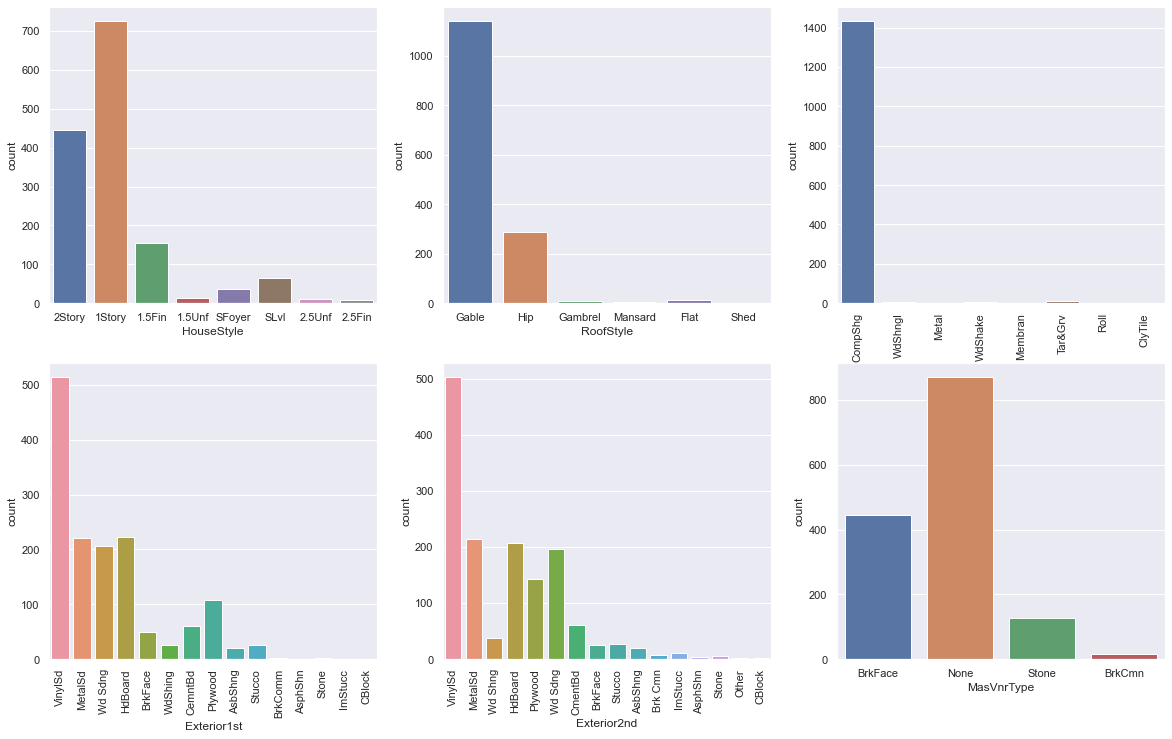

In [20]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'HouseStyle',  data = hs)
plt.subplot(2,3,2)
sns.countplot(x = 'RoofStyle', data = hs)
plt.subplot(2,3,3)
sns.countplot(x = 'RoofMatl', data = hs)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Exterior1st', data = hs)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.countplot(x = 'Exterior2nd',  data = hs)
plt.xticks(rotation=90)
plt.subplot(2,3,6)
sns.countplot(x = 'MasVnrType', data = hs)
plt.show()

In [21]:
#Labelling the low values as others to make the analysis easy.
hs['HouseStyle'] = hs['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')
hs['RoofStyle'] = hs['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],'Others')
hs['Exterior1st'] = hs['Exterior1st'].replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')
hs['Exterior2nd'] = hs['Exterior2nd'].replace(['Other','AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','BrkFace'],'Others')

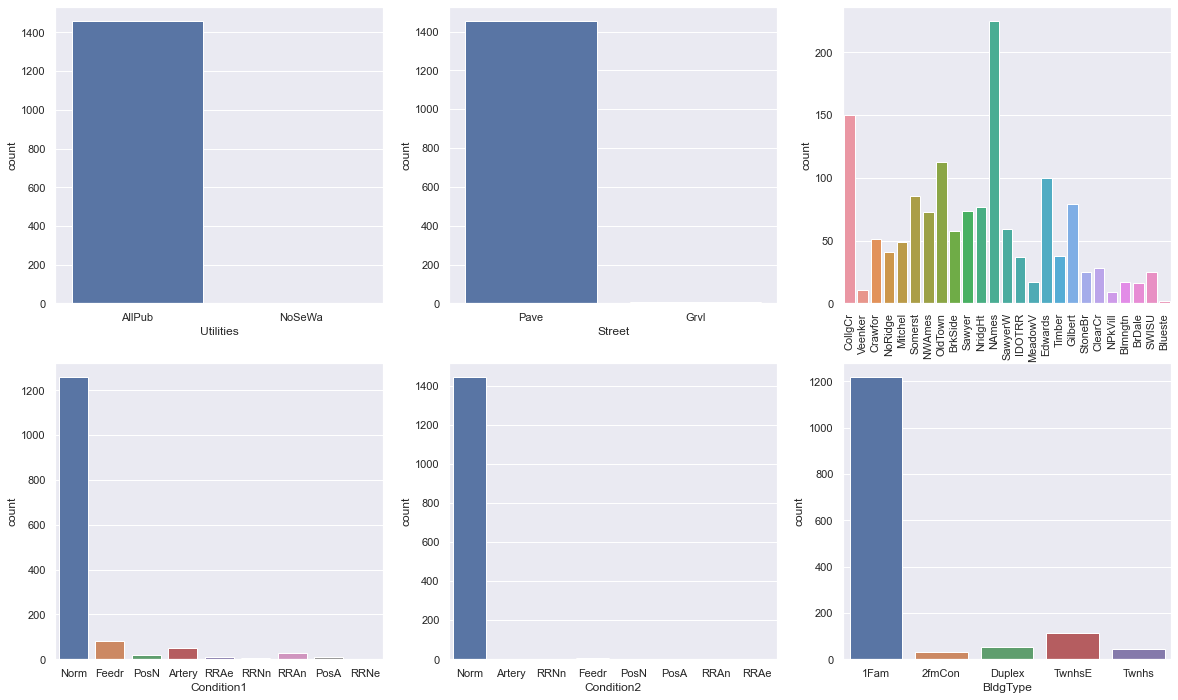

In [22]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'Utilities',  data = hs)
plt.subplot(2,3,2)
sns.countplot(x = 'Street', data = hs)
plt.subplot(2,3,3)
sns.countplot(x = 'Neighborhood', data = hs)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Condition1', data = hs)
plt.subplot(2,3,5)
sns.countplot(x = 'Condition2',  data = hs)
plt.subplot(2,3,6)
sns.countplot(x = 'BldgType', data = hs)
plt.show()

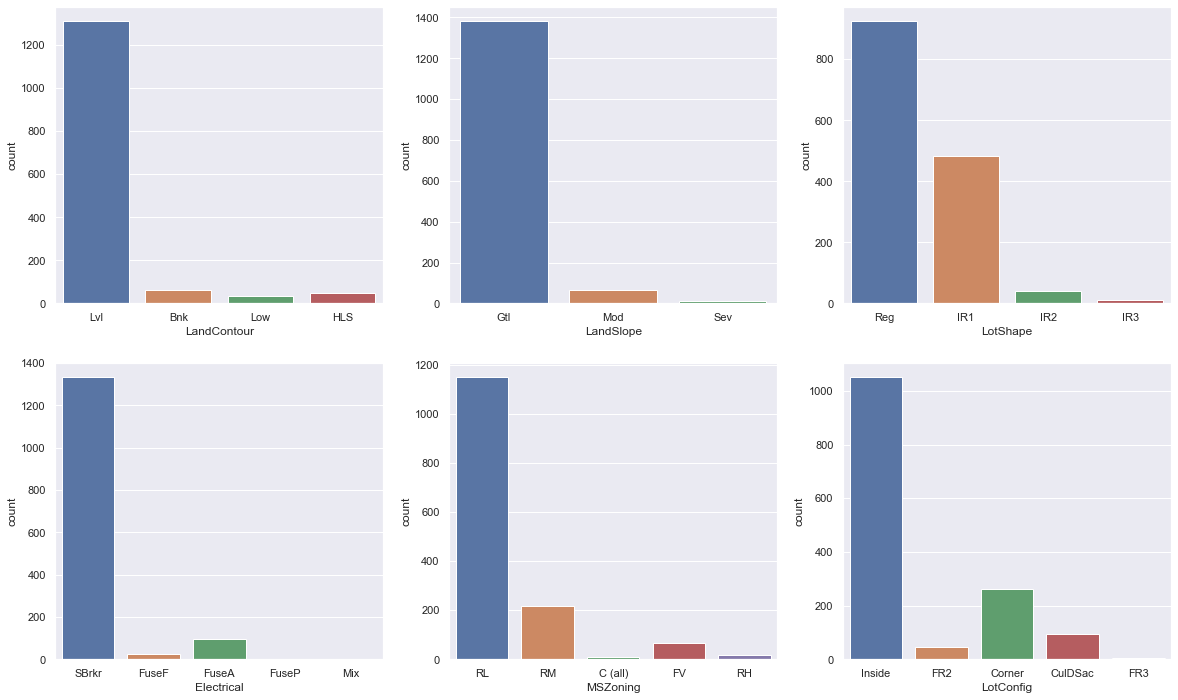

In [23]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'LandContour',  data = hs)
plt.subplot(2,3,2)
sns.countplot(x = 'LandSlope', data = hs)
plt.subplot(2,3,3)
sns.countplot(x = 'LotShape', data = hs)
plt.subplot(2,3,4)
sns.countplot(x = 'Electrical', data = hs)
plt.subplot(2,3,5)
sns.countplot(x = 'MSZoning',  data = hs)
plt.subplot(2,3,6)
sns.countplot(x = 'LotConfig', data = hs)
plt.show()

In [24]:
hs['MSZoning'] = hs['MSZoning'].replace(['RH','C (all)'],'Others')

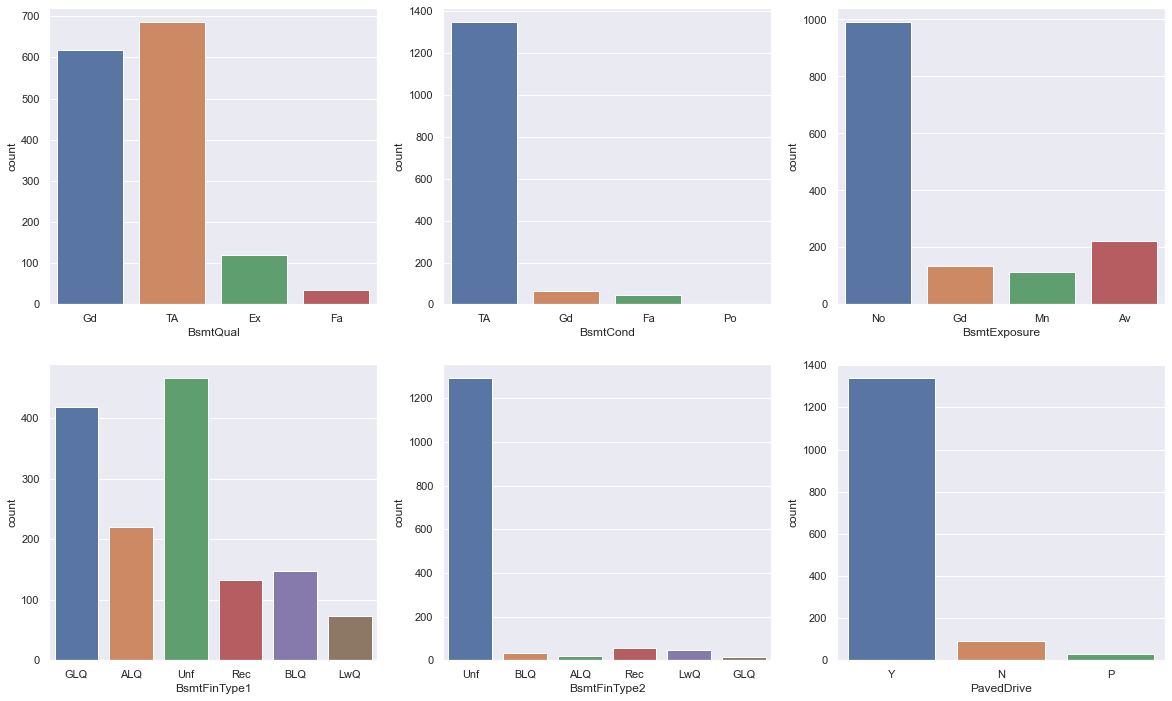

In [25]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtQual',  data = hs)
plt.subplot(2,3,2)
sns.countplot(x = 'BsmtCond', data = hs)
plt.subplot(2,3,3)
sns.countplot(x = 'BsmtExposure', data = hs)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtFinType1', data = hs)
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtFinType2',  data = hs)
plt.subplot(2,3,6)
sns.countplot(x = 'PavedDrive', data = hs)
plt.show()

In [26]:
#diving the categorial and numeric variables
num_hs = hs.select_dtypes(include=['int64', 'float64'])
cat_hs = hs.select_dtypes(include=['object'])

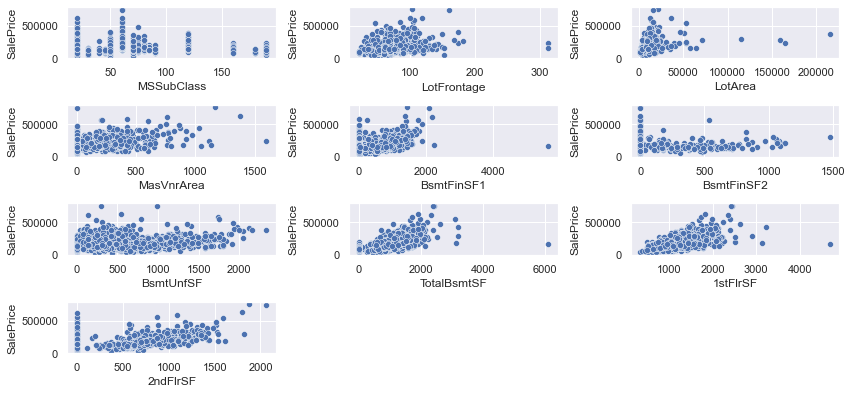

In [27]:
#Scatter plot for different variables with Sale Price
fig=plt.subplots(figsize=(15, 15))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(hs[feature], hs['SalePrice'])
    plt.tight_layout()

**Below Features show positive corelation:**
* LotFrontage 
* LotArea
* TotalBsmtSF
* 1stFlrSF
* 2ndFlrSF


* **MSSubClass has discrete values**

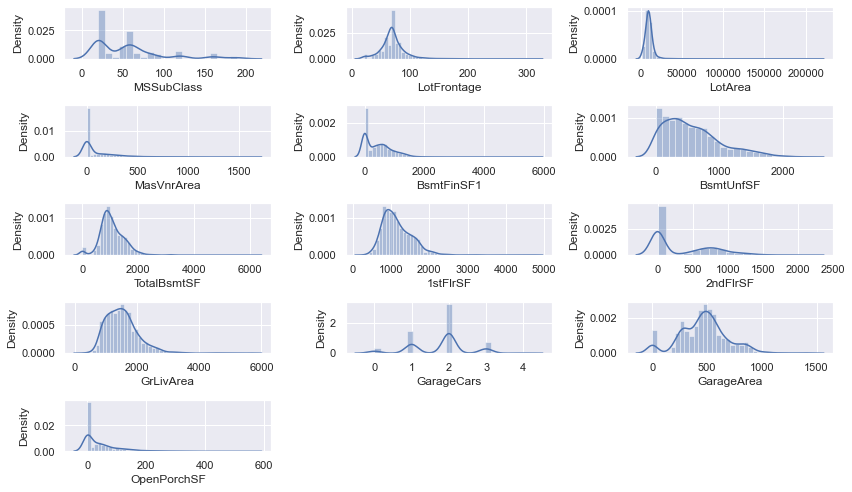

In [28]:
#histogram for the numeric variables to check the distribution
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','GrLivArea', 'GarageCars', 'GarageArea', 'OpenPorchSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.distplot(hs[feature])
    plt.tight_layout()

In [29]:
hs[[ 'LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()

,LowQualFinSF,GrLivArea,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,5.844521,1515.463699,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041
std,48.623081,525.480383,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024
min,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1129.500000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1464.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1776.750000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,572.000000,5642.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


In [30]:
hs[['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()

,LowQualFinSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,5.844521,21.954110,3.409589,15.060959,2.758904,43.489041
std,48.623081,61.119149,29.317331,55.757415,40.177307,496.123024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,572.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


In [31]:
#dropping the features with fixed values.
hs.drop(['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

In [32]:
hs[['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']].describe()

,GarageYrBlt,YearBuilt,YearRemodAdd,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,1978.589041,1971.267808,1984.865753,2007.815753
std,23.997022,30.202904,20.645407,1.328095
min,1900.000000,1872.000000,1950.000000,2006.000000
25%,1962.000000,1954.000000,1967.000000,2007.000000
50%,1980.000000,1973.000000,1994.000000,2008.000000
75%,2001.000000,2000.000000,2004.000000,2009.000000
max,2010.000000,2010.000000,2010.000000,2010.000000


In [33]:
# dropping the year as this features are not much important
hs.drop(['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold'], axis=1, inplace=True)

In [34]:
hs['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [35]:
#Dropping the fetaures which are not adding the variance to the data which are not useful.
hs.drop(['MasVnrArea'], axis=1, inplace=True)

In [36]:
hs['LotFrontage'].value_counts()

69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
112.0      1
138.0      1
149.0      1
38.0       1
111.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [37]:
#as the values are integer and hence converting to int64
hs['LotFrontage'] = hs['LotFrontage'].astype('int64')

In [38]:
#converting object variables to category
for i in cat_hs.columns:
    if cat_hs.dtypes[i] == 'object':
        cat_hs[i] = cat_hs[i].astype('category')

In [39]:
cat_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSZoning       1460 non-null   category
 1   Street         1460 non-null   category
 2   LotShape       1460 non-null   category
 3   LandContour    1460 non-null   category
 4   Utilities      1460 non-null   category
 5   LotConfig      1460 non-null   category
 6   LandSlope      1460 non-null   category
 7   Neighborhood   1460 non-null   category
 8   Condition1     1460 non-null   category
 9   Condition2     1460 non-null   category
 10  BldgType       1460 non-null   category
 11  HouseStyle     1460 non-null   category
 12  RoofStyle      1460 non-null   category
 13  RoofMatl       1460 non-null   category
 14  Exterior1st    1460 non-null   category
 15  Exterior2nd    1460 non-null   category
 16  MasVnrType     1460 non-null   category
 17  ExterQual      1460 non-null   ca

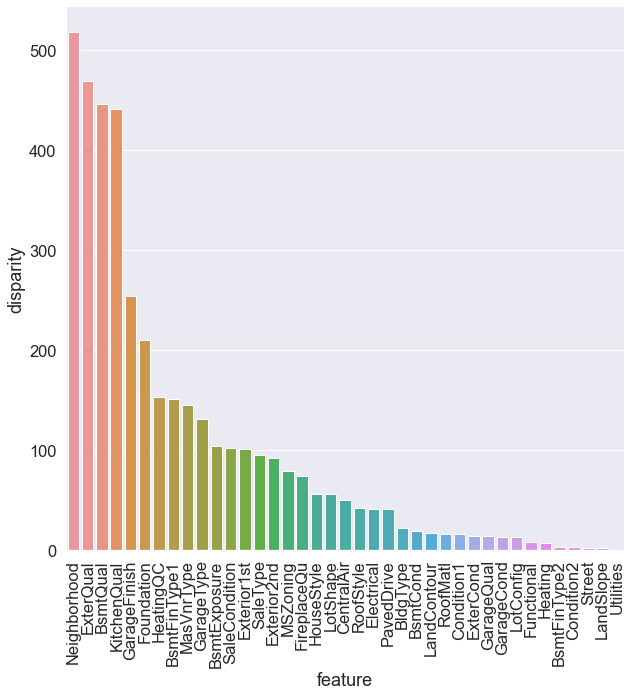

In [40]:

import scipy.stats as stats

def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = cat_hs.columns
    pvals = []
    for c in cat_hs.columns:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(hs)
a['disparity'] = np.log(1./a['pval'].values)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

**Some of the influencing features from the above chart are:**

    - Neighbourhood
    - ExterQual
    - BsmtQual
    - KitchenQual

**Creating Dummy varibales for the categorical variables**

In [41]:
cat_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSZoning       1460 non-null   category
 1   Street         1460 non-null   category
 2   LotShape       1460 non-null   category
 3   LandContour    1460 non-null   category
 4   Utilities      1460 non-null   category
 5   LotConfig      1460 non-null   category
 6   LandSlope      1460 non-null   category
 7   Neighborhood   1460 non-null   category
 8   Condition1     1460 non-null   category
 9   Condition2     1460 non-null   category
 10  BldgType       1460 non-null   category
 11  HouseStyle     1460 non-null   category
 12  RoofStyle      1460 non-null   category
 13  RoofMatl       1460 non-null   category
 14  Exterior1st    1460 non-null   category
 15  Exterior2nd    1460 non-null   category
 16  MasVnrType     1460 non-null   category
 17  ExterQual      1460 non-null   ca

In [42]:
cat_hs.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [43]:
cat_hs = pd.get_dummies(cat_hs, drop_first=True)

In [44]:
cat_hs.head()

,MSZoning_Others,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0
1,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0
2,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
3,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0


In [45]:
hs_df= pd.concat([hs, cat_hs], axis=1)

In [46]:
hs_df.drop(['Id','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], axis=1, inplace=True)

In [47]:
hs_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,60,65,8450,7,5,706,0,150,856,856,...,0,0,0,0,0,0,1,1,0,0
1,20,80,9600,6,8,978,0,284,1262,1262,...,0,0,0,0,0,0,1,1,0,0
2,60,68,11250,7,5,486,0,434,920,920,...,0,0,0,0,0,0,1,1,0,0
3,70,60,9550,7,5,216,0,540,756,961,...,0,0,0,0,0,0,1,0,0,0
4,60,84,14260,8,5,655,0,490,1145,1145,...,0,0,0,0,0,0,1,1,0,0


In [48]:
hs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 199 entries, MSSubClass to SaleCondition_Partial
dtypes: int64(26), uint8(173)
memory usage: 543.3 KB


## Model Building & Evaluation

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

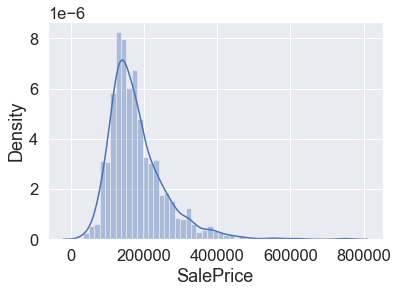

In [50]:
sns.distplot(hs_df['SalePrice'])

**SalePrice is highly skewed, making the log transformation to change the distribution**

In [51]:
hs_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [52]:
print("Skewness: %f" % hs['SalePrice'].skew())

Skewness: 1.882876


In [53]:
hs_df['SalePrice']=np.log(hs.SalePrice)

In [54]:
hs_df['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

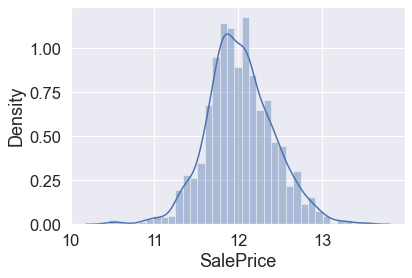

In [55]:
sns.distplot(hs_df['SalePrice'])

In [56]:
y = hs_df['SalePrice']
X = hs_df.drop(['SalePrice'], axis=1)

In [57]:
hs_df.drop(['SalePrice'], axis=1, inplace=True)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Linear Regression

In [59]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [60]:
#Intercept and Coefficient of the linear regression function
print(lm.intercept_)
print(lm.coef_)

7.735137746229671
[-4.70520292e-04  3.55362042e-04  2.46811213e-06  4.87867509e-02
  3.84434605e-02  5.75435047e-05  3.64661454e-05  3.20908994e-06
  9.72219247e-05  1.95718593e-04  1.61051635e-04  7.10359122e-05
  2.35178346e-02  6.19157990e-04  1.85135809e-02  2.22674622e-02
  9.57258242e-03 -9.28115675e-02  1.12885670e-03  1.58742952e-02
  1.86990297e-02  1.08117064e-04  8.09169617e-05  4.62150948e-05
 -1.87918501e-04 -1.12649091e-01 -1.45241817e-02 -2.38592960e-02
  1.12272264e-01  1.70201465e-02 -1.31309570e-03  3.22132512e-03
  3.12584201e-03 -9.48732004e-03  1.12958536e-02 -8.81193220e-02
  3.41067888e-02 -4.40425228e-02 -3.68669231e-02 -6.83713693e-03
  1.10515912e-02 -1.46363895e-01  2.21863899e-02 -9.30640999e-02
  2.97262237e-03  9.72104707e-02  1.80348800e-02  1.25551825e-01
 -5.04303267e-02  3.13468969e-02 -1.00696424e-01 -2.03308751e-01
 -1.33149685e-02  9.88886701e-04  6.43194381e-02 -7.60967918e-03
  4.87642700e-02  7.36490096e-02 -4.40998381e-02  4.54135812e-02
 -6.473

In [61]:
#Calculating the R2, RSS, RMSE values for the Linear Regression
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric=[]
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

rmse_train_lr = mean_squared_error(y_train, y_pred_train)
print(rmse_train_lr)
metric.append(rmse_train_lr**0.5)

rmse_test_lr = mean_squared_error(y_test, y_pred_test)
print(rmse_test_lr)
metric.append(rmse_test_lr**0.5)

0.9498010807799595
0.8622284054201281
8.056537106630437
9.92900195117278
0.007890829683281525
0.02266895422642187


**As we can see the difference in the R2 value for train (95.4%) and test (86.25) we see there is overfitting. Let us try choosing the features using RFE**

In [62]:
#Feature Scaling
sc = MinMaxScaler()
sc.fit(X_train)

MinMaxScaler()

In [63]:
X_train_sc = pd.DataFrame(data=sc.transform(X_train), columns= X_train.columns)
X_test_sc = pd.DataFrame(data=sc.transform(X_test), columns= X_test.columns)

In [64]:
print(X_train_sc)
print(X_test_sc)

      MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  BsmtFinSF1  \
0       0.058824     0.157534  0.019306     0.444444        0.625    0.082920   
1       0.235294     0.236301  0.039403     0.666667        0.500    0.174876   
2       0.176471     0.106164  0.033981     0.555556        0.375    0.016655   
3       0.176471     0.130137  0.017931     0.555556        0.875    0.000000   
4       1.000000     0.133562  0.046139     0.333333        0.625    0.000000   
...          ...          ...       ...          ...          ...         ...   
1016    0.176471     0.133562  0.021158     0.444444        0.500    0.000000   
1017    0.235294     0.143836  0.031445     0.666667        0.500    0.114812   
1018    0.000000     0.160959  0.228257     0.888889        0.500    0.320695   
1019    0.588235     0.160959  0.029672     0.888889        0.500    0.000000   
1020    0.176471     0.133562  0.041929     0.444444        0.625    0.000000   

      BsmtFinSF2  BsmtUnfSF

In [65]:
# number of features = n, the function prints and returns top n features selected by RFE

def top_n_features(n):
    top_n_cols = []
    
    lm = LinearRegression()
    lm.fit(X_train_sc, y_train)
    rfe = RFE(lm, n)
    rfe = rfe.fit(X_train_sc, y_train)
    
    print("Top %d features : " %n)
    rfe_ranking = list(zip(X_train_sc.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    return top_n_cols

In [66]:
# Checking top 45, 50 and 55 features
top_45 = top_n_features(45)
top_50 = top_n_features(50)
top_55 = top_n_features(55)
top_65 = top_n_features(65)
top_75 = top_n_features(75)

Top 45 features : 
['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'GarageArea', 'WoodDeckSF', 'Street_Pave', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_OldTown', 'Condition2_Feedr', 'Condition2_PosN', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Heating_GasA', 'Heating_GasW', 'Heating_Wall', 'KitchenQual_Fa', 'Functional_Min1', 'Functional_Min2', 'Functional_Sev', 'Functional_Typ', 'GarageQual_Fa', 'GarageQual_Po', 'GarageCond_Po', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_New', 'SaleCondition_Partial']
Top 50 features : 
['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfB

In [67]:
top_80 = top_n_features(80)
top_90 = top_n_features(90)

Top 80 features : 
['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'GarageArea', 'WoodDeckSF', 'MSZoning_Others', 'Street_Pave', 'LandSlope_Sev', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition2_Feedr', 'Condition2_PosN', 'Condition2_RRAn', 'Condition2_RRNn', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Others', 'Exterior1st_Plywood', 'Exterior1st_Wd Sdng', 'Exterior2nd_CmentBd', 'ExterCond_Po', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_Po', 'Heating_G

In [68]:
import statsmodels.api as sm
def build_regressor(X_train,y_train,cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lr = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(lr.summary())    

In [69]:
build_regressor(X_train_sc, y_train, top_45)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     240.3
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:36:24   Log-Likelihood:                 757.33
No. Observations:                1021   AIC:                            -1425.
Df Residuals:                     976   BIC:                            -1203.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.01

In [70]:
build_regressor(X_train_sc, y_train, top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     226.2
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:36:30   Log-Likelihood:                 771.57
No. Observations:                1021   AIC:                            -1445.
Df Residuals:                     972   BIC:                            -1204.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.12

In [71]:
build_regressor(X_train_sc, y_train, top_55)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     216.7
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:36:34   Log-Likelihood:                 771.61
No. Observations:                1021   AIC:                            -1441.
Df Residuals:                     970   BIC:                            -1190.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.13

In [72]:
build_regressor(X_train_sc, y_train, top_65)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     204.8
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:36:48   Log-Likelihood:                 835.74
No. Observations:                1021   AIC:                            -1549.
Df Residuals:                     960   BIC:                            -1249.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.28

In [73]:
build_regressor(X_train_sc, y_train, top_75)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     190.6
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:36:52   Log-Likelihood:                 879.77
No. Observations:                1021   AIC:                            -1618.
Df Residuals:                     950   BIC:                            -1268.
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.66

In [74]:
build_regressor(X_train_sc, y_train, top_80)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     186.5
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:36:56   Log-Likelihood:                 904.96
No. Observations:                1021   AIC:                            -1658.
Df Residuals:                     945   BIC:                            -1283.
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.65

In [75]:
build_regressor(X_train_sc, y_train, top_90)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     175.0
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:37:01   Log-Likelihood:                 939.51
No. Observations:                1021   AIC:                            -1707.
Df Residuals:                     935   BIC:                            -1283.
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.58

## Ridge Regression

In [76]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10,100,1000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [77]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010159,0.006152,0.002613,0.000506,0.00001,{'alpha': 1e-05},0.888151,0.691037,0.827676,0.621047,...,0.788724,0.114181,8,0.956369,0.953283,0.953153,0.951559,0.951605,0.953194,0.001749
1,0.004713,0.000207,0.001955,0.000381,0.0001,{'alpha': 0.0001},0.888164,0.691051,0.827729,0.622040,...,0.788943,0.113898,7,0.956369,0.953283,0.953153,0.951559,0.951604,0.953194,0.001749
2,0.004793,0.000240,0.002013,0.000475,0.001,{'alpha': 0.001},0.888277,0.691190,0.828244,0.631700,...,0.791072,0.111176,6,0.956360,0.953283,0.953145,0.951552,0.951595,0.953187,0.001749
3,0.005028,0.000216,0.001792,0.000184,0.01,{'alpha': 0.01},0.888414,0.692529,0.831667,0.706731,...,0.807205,0.092113,5,0.955749,0.953277,0.952598,0.951068,0.950911,0.952721,0.001761
4,0.004918,0.000419,0.001966,0.000195,0.1,{'alpha': 0.1},0.880478,0.702684,0.833762,0.875813,...,0.840153,0.072724,4,0.946761,0.952896,0.944911,0.942695,0.941301,0.945713,0.004048


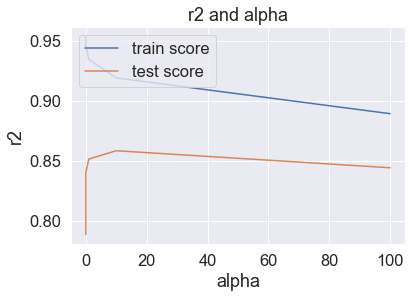

In [78]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [79]:
model_cv.best_params_

{'alpha': 10}

In [80]:
#optimum alpha

alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-6.23679392e-04, -6.06660346e-04,  1.55977191e-06,  6.30703590e-02,
        3.70801337e-02, -2.33730843e-05,  3.73084786e-05,  3.19604746e-06,
        1.71314568e-05,  1.05137741e-04,  8.81170203e-05,  1.06626313e-04,
        5.36376167e-02,  1.15776018e-02,  3.61043988e-02,  2.93284156e-02,
        1.59996028e-02, -3.87845713e-02,  1.14164727e-02,  2.75351833e-02,
        5.77904678e-02,  1.92655911e-05,  7.74237546e-05, -2.64742241e-05,
        2.79316454e-04, -6.20969020e-02,  1.89972635e-02, -2.57801976e-02,
        2.36963614e-02,  2.32549696e-02, -4.36911343e-02,  1.25528745e-03,
        3.66572997e-02,  4.30961173e-02,  4.78780711e-02, -1.43664451e-02,
        3.40463374e-02, -4.13251020e-02, -9.33021167e-03, -1.10606198e-02,
        2.89913775e-02, -1.24688004e-02, -3.81016493e-03, -2.88970236e-02,
        4.68955727e-04,  5.71765900e-02, -1.34983717e-02,  9.85004319e-02,
       -8.46620025e-02, -1.54396487e-02, -7.23450801e-02, -5.90216159e-02,
       -1.88796531e-02, -

In [81]:
ridge.score(X_train,y_train)

0.9151924319991236

In [82]:
ridge.score(X_test,y_test)

0.8899504711902485

In [83]:
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 10.555),
 ('MSSubClass', -0.091),
 ('LotFrontage', -0.085),
 ('LotArea', -0.072),
 ('OverallQual', -0.063),
 ('OverallCond', -0.062),
 ('BsmtFinSF1', -0.059),
 ('BsmtFinSF2', -0.056),
 ('BsmtUnfSF', -0.049),
 ('TotalBsmtSF', -0.048),
 ('1stFlrSF', -0.046),
 ('2ndFlrSF', -0.045),
 ('GrLivArea', -0.044),
 ('BsmtFullBath', -0.044),
 ('BsmtHalfBath', -0.041),
 ('FullBath', -0.041),
 ('HalfBath', -0.041),
 ('BedroomAbvGr', -0.039),
 ('KitchenAbvGr', -0.039),
 ('TotRmsAbvGrd', -0.038),
 ('Fireplaces', -0.038),
 ('GarageCars', -0.035),
 ('GarageArea', -0.034),
 ('WoodDeckSF', -0.034),
 ('OpenPorchSF', -0.034),
 ('MoSold', -0.031),
 ('MSZoning_Others', -0.03),
 ('MSZoning_RL', -0.029),
 ('MSZoning_RM', -0.026),
 ('Street_Pave', -0.026),
 ('LotShape_IR2', -0.026),
 ('LotShape_IR3', -0.025),
 ('LotShape_Reg', -0.025),
 ('LandContour_HLS', -0.025),
 ('LandContour_Low', -0.024),
 ('LandContour_Lvl', -0.023),
 ('Utilities_NoSeWa', -0.023),
 ('LotConfig_CulDSac', -0.021),
 ('LotConfig_

In [84]:
#calculating some metrics as R2 Score, RSS, RMSE for Ridge Regression

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2= []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

rmse_train_lr = mean_squared_error(y_train, y_pred_train)
print(rmse_train_lr)
metric2.append(rmse_train_lr**0.5)

rmse_test_lr = mean_squared_error(y_test, y_pred_test)
print(rmse_test_lr)
metric2.append(rmse_test_lr**0.5)

0.9151924319991236
0.8899504711902485
13.610956752418986
7.9311122848635955
0.013331005634102826
0.018107562294209123


## Lasso Regression

In [85]:
params = {'alpha': [ 0.0001, 0.001, 0.004, 0.01, 0.07, 0.1, 0.5, 0.9, 1]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.004, 0.01, 0.07, 0.1, 0.5,
                                   0.9, 1]},
             return_train_score=True, scoring='r2', verbose=1)

In [86]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.136999,0.020143,0.001821,0.000111,0.0001,{'alpha': 0.0001},0.891300,0.699141,0.839125,0.843265,...,0.838943,0.076399,2,0.947405,0.950915,0.944531,0.944965,0.941907,0.945944,0.003036
1,0.077094,0.038306,0.002013,0.000123,0.001,{'alpha': 0.001},0.882118,0.697443,0.837332,0.916425,...,0.847632,0.079822,1,0.905766,0.929014,0.911257,0.900106,0.898269,0.908883,0.011048
2,0.050189,0.006636,0.001630,0.000107,0.004,{'alpha': 0.004},0.877319,0.648200,0.817722,0.896830,...,0.825815,0.093060,3,0.869968,0.890736,0.879896,0.864545,0.863297,0.873688,0.010340
3,0.064557,0.040877,0.001708,0.000107,0.01,{'alpha': 0.01},0.863959,0.589635,0.783282,0.867504,...,0.796181,0.108595,4,0.834415,0.865450,0.845711,0.830485,0.828176,0.840847,0.013698
4,0.223387,0.263264,0.002189,0.000412,0.07,{'alpha': 0.07},0.821534,0.461175,0.708282,0.793572,...,0.722309,0.137309,5,0.753284,0.802955,0.773472,0.758183,0.744925,0.766564,0.020430


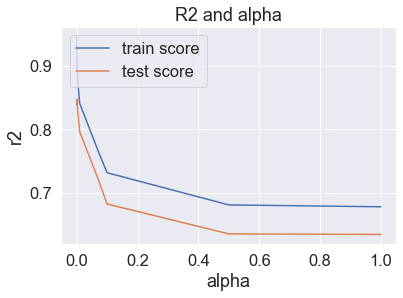

In [87]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')

plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [88]:
model_cv.best_params_

{'alpha': 0.001}

In [89]:
#optimum alpha

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [90]:
lasso.coef_

array([-6.39747048e-04, -6.60603284e-04,  1.53952492e-06,  7.20218224e-02,
        3.86606036e-02, -9.92806246e-06,  1.37687290e-05,  1.45701085e-05,
        8.26637317e-06,  1.42029474e-04,  9.62003555e-05,  9.09288887e-05,
        5.56972425e-02,  0.00000000e+00,  3.23518992e-02,  2.75612097e-02,
        7.32634546e-03, -8.65018175e-03,  8.76286736e-03,  2.95426530e-02,
        6.03123908e-02,  2.63688943e-05,  9.03060767e-05, -2.27582285e-05,
       -0.00000000e+00, -1.98067175e-02,  4.27589899e-02, -1.53310814e-02,
        0.00000000e+00,  3.47469088e-04, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.46910545e-02, -0.00000000e+00,
        3.32514860e-02, -0.00000000e+00, -0.00000000e+00, -6.46011030e-04,
        4.39939855e-03, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  5.72547216e-02, -0.00000000e+00,  1.01464803e-01,
       -6.70647045e-02, -0.00000000e+00, -5.87172459e-02, -0.00000000e+00,
       -0.00000000e+00, -

In [91]:
lasso.score(X_train,y_train)

0.9007412954716254

In [92]:
lasso.score(X_test,y_test)

0.8865646774396878

In [93]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list((zip(cols, model_parameters)))

[('constant', 10.585),
 ('MSSubClass', -0.126),
 ('LotFrontage', -0.067),
 ('LotArea', -0.059),
 ('OverallQual', -0.052),
 ('OverallCond', -0.05),
 ('BsmtFinSF1', -0.048),
 ('BsmtFinSF2', -0.036),
 ('BsmtUnfSF', -0.034),
 ('TotalBsmtSF', -0.03),
 ('1stFlrSF', -0.027),
 ('2ndFlrSF', -0.026),
 ('GrLivArea', -0.024),
 ('BsmtFullBath', -0.02),
 ('BsmtHalfBath', -0.02),
 ('FullBath', -0.02),
 ('HalfBath', -0.017),
 ('BedroomAbvGr', -0.015),
 ('KitchenAbvGr', -0.01),
 ('TotRmsAbvGrd', -0.01),
 ('Fireplaces', -0.009),
 ('GarageCars', -0.007),
 ('GarageArea', -0.007),
 ('WoodDeckSF', -0.006),
 ('OpenPorchSF', -0.006),
 ('MoSold', -0.005),
 ('MSZoning_Others', -0.004),
 ('MSZoning_RL', -0.003),
 ('MSZoning_RM', -0.002),
 ('Street_Pave', -0.001),
 ('LotShape_IR2', -0.001),
 ('LotShape_IR3', -0.001),
 ('LotShape_Reg', -0.001),
 ('LandContour_HLS', -0.0),
 ('LandContour_Low', -0.0),
 ('LandContour_Lvl', 0.0),
 ('Utilities_NoSeWa', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', -0.0),
 ('Lo

In [94]:
#calculating some metrics as R2 Score, RSS, RMSE for Lasso Regression

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3= []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

rmse_train_lr = mean_squared_error(y_train, y_pred_train)
print(rmse_train_lr)
metric3.append(rmse_train_lr**0.5)

rmse_test_lr = mean_squared_error(y_test, y_pred_test)
print(rmse_test_lr)
metric3.append(rmse_test_lr**0.5)

0.9007412954716254
0.8865646774396878
15.930252057491847
8.17512160230019
0.015602597509786334
0.018664661192466184


In [95]:
#Creating a table to display all metrics

lr_table = {'Metric': ['R2 Score(Train)', 'R2 Score (Test)', 'RSS (Train)', 'RSS (Test)', 'RMSE (Train)', 'RMSE (Test)'], 'Linear Regression':metric}
lr_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Linear Regression'])
rg_metric = pd.Series(metric2, name= 'Ridge Regression')
ls_metric = pd.Series(metric3, name= 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis=1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score(Train),0.949801,0.915192,0.900741
1,R2 Score (Test),0.862228,0.889950,0.886565
2,RSS (Train),8.056537,13.610957,15.930252
3,RSS (Test),9.929002,7.931112,8.175122
4,RMSE (Train),0.088830,0.115460,0.124910
5,RMSE (Test),0.150562,0.134564,0.136619


## Observe the changes in the coefficients after regularization

In [96]:
betas = pd.DataFrame(index=X.columns)

In [97]:
betas.rows = X.columns

In [98]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [99]:
pd.set_option('display.max_rows', None)
betas

,Linear,Ridge,Lasso
MSSubClass,-4.705203e-04,-0.000624,-0.000640
LotFrontage,3.553620e-04,-0.000607,-0.000661
LotArea,2.468112e-06,0.000002,0.000002
OverallQual,4.878675e-02,0.063070,0.072022
OverallCond,3.844346e-02,0.037080,0.038661
BsmtFinSF1,5.754350e-05,-0.000023,-0.000010
BsmtFinSF2,3.646615e-05,0.000037,0.000014
BsmtUnfSF,3.209090e-06,0.000003,0.000015
TotalBsmtSF,9.722192e-05,0.000017,0.000008
1stFlrSF,1.957186e-04,0.000105,0.000142


## Conclusion

we got very good score for both Ridge and Lasso Regression

    Metric             Linear Regression  Ridge Regression  Lasso Regression
    
    R2 Score(Train)        0.949801            0.915192         0.900741
    
    R2 Score (Test)        0.862228            0.889950         0.886565

**Top5 most significant features in Ridge are:**

 * ('SaleType_Oth', 0.063),
 * ('SaleType_WD', 0.067),
 * ('SaleCondition_Normal', 0.085),
 * ('SaleCondition_Others', 0.09),
 * ('SaleCondition_Partial', 0.099)

**Top5 most significant features in Lasso are:**
 * ('SaleType_Oth', 0.065),
 * ('SaleType_WD', 0.072),
 * ('SaleCondition_Normal', 0.097),
 * ('SaleCondition_Others', 0.101),
 * ('SaleCondition_Partial', 0.106)

**Optimal Value of lamda for Ridge is 10**

**Optimal Value of lamda for Lasso is 0.001**

**Ridge Regression did better than Lasso Regression when R2 is compared.**

**RSS Values of Ridge Regression and Lasso Regression are small for test than train set, where for Linear regression is more for test set.**

**Ridge did better even with RSS values when compared to Lasso.**